In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [140]:
# БАРИСТА
def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

all_candidates = []

for i in range(20): # Берем первые 20 страниц
  html = f'https://hh.ru/search/resume?area=1&exp_period=all_time&job_search_status=active_search&job_search_status=looking_for_offers&logic=normal&no_magic=true&order_by=relevance&ored_clusters=true&pos=full_text&search_period=30&text=%D0%B1%D0%B0%D1%80%D0%B8%D1%81%D1%82%D0%B0+%D0%B2+%D0%BA%D0%BE%D1%84%D0%B5%D0%B9%D0%BD%D1%8E&items_on_page=20&searchSessionId=59616e58-395a-4e21-8c7c-631a268c021f&page={i}'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):
     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд, поэтому проверяем, что добавляемы элемент отличен от прошлого добавленного
     # Некоторые слегка обнаглевшие люди указывают з/п в долларах и евро, удаляем их из списка

  final_data = clean_data(candidates) # Приводим в нормальный вид
  all_candidates.extend(final_data) # Перевод листа словарей в датафреймм написал чат-гпт, каюсь

  for item in final_data:
     print(item)

df_barista = pd.DataFrame(all_candidates)
df_barista = df_barista.transpose()
display(df_barista)

{'salary': '150000 ₽', 'experience': '8 лет 5 месяцев'}
{'salary': '150000 ₽', 'experience': '13 лет 3 месяца'}
{'salary': '50000 ₽', 'experience': '2 года 4 месяца'}
{'salary': '150000 ₽', 'experience': '10 лет 1 месяц'}
{'salary': '120000 ₽', 'experience': '8 лет 8 месяцев'}
{'salary': '100000 ₽', 'experience': '10 лет 3 месяца'}
{'salary': '100000 ₽', 'experience': '7 лет'}
{'salary': '90000 ₽', 'experience': '3 года 10 месяцев'}
{'salary': '120000 ₽', 'experience': '7 лет 7 месяцев'}
{'salary': '115000 ₽', 'experience': '12 лет 7 месяцев'}
{'salary': '150000 ₽', 'experience': '11 лет'}
{'salary': '140000 ₽', 'experience': '7 лет 11 месяцев'}
{'salary': '70000 ₽', 'experience': '8 лет 3 месяца'}
{'salary': '80000 ₽', 'experience': '5 лет 6 месяцев'}
{'salary': '60000 ₽', 'experience': '4 года 2 месяца'}
{'salary': '80000 ₽', 'experience': '6 лет 8 месяцев'}
{'salary': '30000 ₽', 'experience': 'Ответственность  •  Терпеливость  •  Пунктуальность  •  Желание работать  •  Грамотная реч

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
salary,150000 ₽,150000 ₽,50000 ₽,150000 ₽,120000 ₽,100000 ₽,100000 ₽,90000 ₽,120000 ₽,115000 ₽,...,50000 ₽,80000 ₽,100000 ₽,50000 ₽,50000 ₽,150000 ₽,150000 ₽,400000 ₽,120000 ₽,250000 ₽
experience,8 лет 5 месяцев,13 лет 3 месяца,2 года 4 месяца,10 лет 1 месяц,8 лет 8 месяцев,10 лет 3 месяца,7 лет,3 года 10 месяцев,7 лет 7 месяцев,12 лет 7 месяцев,...,9 лет 4 месяца,10 лет 1 месяц,4 года 2 месяца,9 лет 9 месяцев,10 месяцев,6 лет 4 месяца,6 лет 5 месяцев,14 лет 6 месяцев,6 лет 10 месяцев,12 лет 5 месяцев


In [197]:
# Делаем все ячейки строками + удаляем колонки со странной информацией вместо experience
words = ["год", "года", "месяц", "месяца", "лет"]

df_barista_new = df_barista.copy()

for column in df_barista.columns:
    experience = str(df_barista.loc["experience", column])
    for word in words:
      if word in experience:
        break
    else:
      df_barista_new = df_barista_new.drop(columns=[column])

display(df_barista_new)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
salary,150000 ₽,150000 ₽,50000 ₽,150000 ₽,120000 ₽,100000 ₽,100000 ₽,90000 ₽,120000 ₽,115000 ₽,...,50000 ₽,80000 ₽,100000 ₽,50000 ₽,50000 ₽,150000 ₽,150000 ₽,400000 ₽,120000 ₽,250000 ₽
experience,8 лет 5 месяцев,13 лет 3 месяца,2 года 4 месяца,10 лет 1 месяц,8 лет 8 месяцев,10 лет 3 месяца,7 лет,3 года 10 месяцев,7 лет 7 месяцев,12 лет 7 месяцев,...,9 лет 4 месяца,10 лет 1 месяц,4 года 2 месяца,9 лет 9 месяцев,10 месяцев,6 лет 4 месяца,6 лет 5 месяцев,14 лет 6 месяцев,6 лет 10 месяцев,12 лет 5 месяцев


In [198]:
# Готовим датасет к работе с ним
df_barista_new.loc['salary'] = df_barista_new.loc['salary'].str.replace(' ₽', '').str.replace(' ', '')

# Оставляем только первое число в опыте (годы)
df_barista_new.loc['experience'] = df_barista_new.loc['experience'].str.split().str[0]

df_barista_new.loc['experience'] = df_barista_new.loc['experience'].astype(int)
df_barista_new.loc['salary'] = df_barista_new.loc['salary'].astype(int)

display(df_barista_new)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
salary,150000,150000,50000,150000,120000,100000,100000,90000,120000,115000,...,50000,80000,100000,50000,50000,150000,150000,400000,120000,250000
experience,8,13,2,10,8,10,7,3,7,12,...,9,10,4,9,10,6,6,14,6,12


<ipython-input-194-3eb72e5bcf27>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')


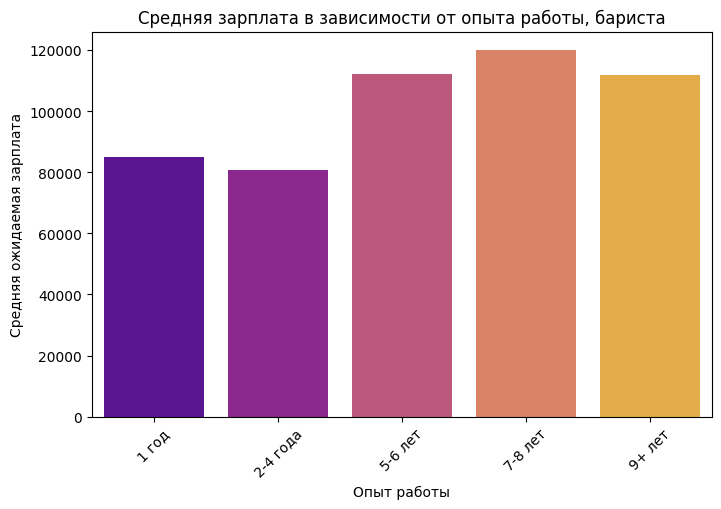

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_barista_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 4:
        groups.append('2-4 года')
    elif 5 <= item <= 6:
        groups.append('5-6 лет')
    elif 7 <= item <= 8:
        groups.append('7-8 лет')
    else:
        groups.append('9+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_barista_new.loc['Experience Group'] = groups
df_grouped = df_barista_new.T.groupby('Experience Group')['salary'].mean().reset_index()

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, бариста')
plt.xticks(rotation=45)
plt.show()

 **Далее идейно такой же код, просто меняем ссылки и учитываем особенности страниц**

In [169]:
# АДМИНИСТРАТОР ЗАЛА
# КРИТЕРИИ: 1) полная занятость; 2) полный день; 3) специализации: администратор или менеджер ресторана

def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

all_candidates = []

for i in range(20): # Берем первые 20 страниц
  html = f'https://hh.ru/search/resume?search_period=0&order_by=relevance&logic=normal&pos=full_text&exp_period=all_time&area=1&employment=full&filter_exp_period=all_time&job_search_status=active_search&job_search_status=looking_for_offers&job_search_status=unknown&professional_role=8&professional_role=74&relocation=living_or_relocation&schedule=fullDay&text=администратор+в+кофейню&gender=unknown&page={i}&searchSessionId=3636c17e-0578-45ff-ba81-15591c276518'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):

     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд, поэтому проверяем, что добавляемы элемент отличен от прошлого добавленного
     # Некоторые слегка обнаглевшие люди указывают з/п в долларах и евро, удаляем их из списка

  final_data = clean_data(candidates) # Приводим в нормальный вид
  all_candidates.extend(final_data) # Перевод листа словарей в датафреймм написал чат-гпт, каюсь

  # for item in final_data:
  #    print(item)

df_manager = pd.DataFrame(all_candidates)
df_manager = df_manager.transpose()
display(df_manager)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
salary,35000 ₽,35000 ₽,45000 ₽,100000 ₽,65000 ₽,105000 ₽,45000 ₽,30000 ₽,90000 ₽,150000 ₽,...,25000 ₽,60000 ₽,40000 ₽,35000 ₽,45000 ₽,30000 ₽,40000 ₽,50000 ₽,30000 ₽,50000 ₽
experience,8 лет 5 месяцев,12 лет 10 месяцев,13 лет 4 месяца,19 лет 10 месяцев,10 лет,4 года 7 месяцев,15 лет 10 месяцев,3 года 7 месяцев,11 лет,12 лет 1 месяц,...,5 лет 2 месяца,7 лет 1 месяц,21 год 9 месяцев,14 лет 10 месяцев,6 лет 9 месяцев,24 года 3 месяца,2 года 8 месяцев,13 лет 8 месяцев,7 лет 11 месяцев,6 лет 1 месяц


In [199]:
words = ["год", "года", "месяц", "месяца", "лет"]

df_manager_new = df_manager.copy()

for column in df_manager.columns:
    experience = str(df_manager.loc["experience", column])  # Преобразуем в строку
    for word in words:
      if word in experience:
        break
    else:
      df_manager_new = df_manager_new.drop(columns=[column])

display(df_manager_new)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
salary,35000 ₽,35000 ₽,45000 ₽,100000 ₽,65000 ₽,105000 ₽,45000 ₽,30000 ₽,90000 ₽,150000 ₽,...,25000 ₽,60000 ₽,40000 ₽,35000 ₽,45000 ₽,30000 ₽,40000 ₽,50000 ₽,30000 ₽,50000 ₽
experience,8 лет 5 месяцев,12 лет 10 месяцев,13 лет 4 месяца,19 лет 10 месяцев,10 лет,4 года 7 месяцев,15 лет 10 месяцев,3 года 7 месяцев,11 лет,12 лет 1 месяц,...,5 лет 2 месяца,7 лет 1 месяц,21 год 9 месяцев,14 лет 10 месяцев,6 лет 9 месяцев,24 года 3 месяца,2 года 8 месяцев,13 лет 8 месяцев,7 лет 11 месяцев,6 лет 1 месяц


In [200]:
# Готовим датасет к работе с ним
df_manager_new.loc['salary'] = df_manager_new.loc['salary'].str.replace(' ₽', '').str.replace(' ', '')

# Оставляем только первое число в опыте (годы)
df_manager_new.loc['experience'] = df_manager_new.loc['experience'].str.split().str[0]

df_manager_new.loc['experience'] = df_manager_new.loc['experience'].astype(int)
df_manager_new.loc['salary'] = df_manager_new.loc['salary'].astype(int)

display(df_manager_new)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
salary,35000,35000,45000,100000,65000,105000,45000,30000,90000,150000,...,25000,60000,40000,35000,45000,30000,40000,50000,30000,50000
experience,8,12,13,19,10,4,15,3,11,12,...,5,7,21,14,6,24,2,13,7,6


<ipython-input-147-8f826a078ec8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')


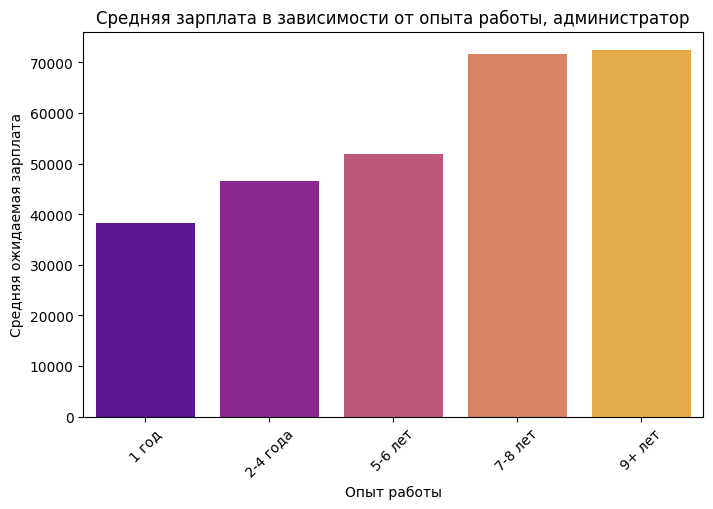

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_manager_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 4:
        groups.append('2-4 года')
    elif 5 <= item <= 6:
        groups.append('5-6 лет')
    elif 7 <= item <= 8:
        groups.append('7-8 лет')
    else:
        groups.append('9+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_manager_new.loc['Experience Group'] = groups
df_grouped = df_manager_new.T.groupby('Experience Group')['salary'].mean().reset_index()

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, администратор')
plt.xticks(rotation=45)
plt.show()

In [172]:
# УБОРКА
# КРИТЕРИИ: 1) живет в регионе; 2) полный день; 3) полная занятость 4) специализации: уборщик / уборщица 5) з/п от 40000 (чтобы избежать нерелевантных предложений)

def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

all_candidates = []

for i in range(20): # Берем первые 20 страниц
  html = f'https://hh.ru/search/resume?isDefaultArea=true&ored_clusters=true&order_by=relevance&search_period=0&logic=normal&pos=full_text&exp_period=all_time&area=1&employment=full&filter_exp_period=all_time&job_search_status=looking_for_offers&job_search_status=active_search&job_search_status=unknown&label=only_with_salary&professional_role=130&relocation=living&schedule=fullDay&text=уборщица+помещений&salary_from=40000&gender=unknown&page={i}&searchSessionId=5b744ea5-5b2a-4df1-ab68-e8af1a445272'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):

     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд, поэтому проверяем, что добавляемы элемент отличен от прошлого добавленного

  final_data = clean_data(candidates) # Приводим в нормальный вид
  all_candidates.extend(final_data) # Перевод листа словарей в датафреймм написал чат-гпт, каюсь

  # for item in final_data:
  #    print(item)

df_cleaning = pd.DataFrame(all_candidates)
df_cleaning = df_cleaning.transpose()
display(df_cleaning)

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
salary,40000 ₽,45000 ₽,45000 ₽,40000 ₽,70000 ₽,50000 ₽,40000 ₽,70000 ₽,40000 ₽,40000 ₽,...,40000 ₽,40000 ₽,40000 ₽,40000 ₽,45000 ₽,45000 ₽,40000 ₽,50000 ₽,50000 ₽,60000 ₽
experience,24 года 2 месяца,5 лет 3 месяца,15 лет 9 месяцев,6 лет 8 месяцев,5 лет 4 месяца,15 лет 9 месяцев,11 лет 6 месяцев,12 лет 9 месяцев,25 лет 3 месяца,4 года,...,работоспособна • Работала помощник воспитате...,9 месяцев,10 лет 8 месяцев,13 лет 1 месяц,21 год 5 месяцев,10 лет,9 лет 8 месяцев,25 лет 7 месяцев,5 лет 7 месяцев,3 года 1 месяц


In [202]:
words = ["год", "года", "месяц", "месяца", "лет"]

df_cleaning_new = df_cleaning.copy()

for column in df_cleaning.columns:
    experience = str(df_cleaning.loc["experience", column])
    for word in words:
      if word in experience:
        break
    else:
      df_cleaning_new = df_cleaning_new.drop(columns=[column])

display(df_cleaning_new)

,0,1,2,3,4,5,6,7,8,9,...,221,223,224,225,226,227,228,229,230,231
salary,40000 ₽,45000 ₽,45000 ₽,40000 ₽,70000 ₽,50000 ₽,40000 ₽,70000 ₽,40000 ₽,40000 ₽,...,40000 ₽,40000 ₽,40000 ₽,40000 ₽,45000 ₽,45000 ₽,40000 ₽,50000 ₽,50000 ₽,60000 ₽
experience,24 года 2 месяца,5 лет 3 месяца,15 лет 9 месяцев,6 лет 8 месяцев,5 лет 4 месяца,15 лет 9 месяцев,11 лет 6 месяцев,12 лет 9 месяцев,25 лет 3 месяца,4 года,...,6 месяцев,9 месяцев,10 лет 8 месяцев,13 лет 1 месяц,21 год 5 месяцев,10 лет,9 лет 8 месяцев,25 лет 7 месяцев,5 лет 7 месяцев,3 года 1 месяц


In [203]:
# Готовим датасет к работе с ним
df_cleaning_new.loc['salary'] = df_cleaning_new.loc['salary'].str.replace(' ₽', '').str.replace(' ', '')

# Оставляем только первое число в опыте (годы)
df_cleaning_new.loc['experience'] = df_cleaning_new.loc['experience'].str.split().str[0]

df_cleaning_new.loc['experience'] = df_cleaning_new.loc['experience'].astype(int)
df_cleaning_new.loc['salary'] = df_cleaning_new.loc['salary'].astype(int)

display(df_cleaning_new)

,0,1,2,3,4,5,6,7,8,9,...,221,223,224,225,226,227,228,229,230,231
salary,40000,45000,45000,40000,70000,50000,40000,70000,40000,40000,...,40000,40000,40000,40000,45000,45000,40000,50000,50000,60000
experience,24,5,15,6,5,15,11,12,25,4,...,6,9,10,13,21,10,9,25,5,3


<ipython-input-175-05c57d7b522c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')


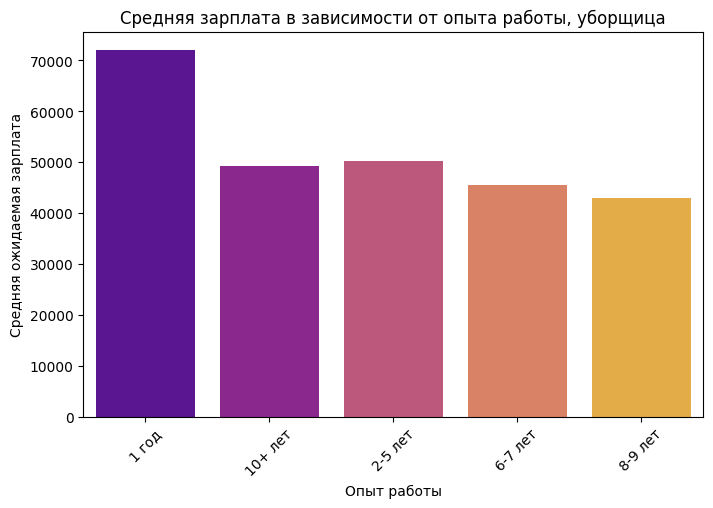

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_cleaning_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 5:
        groups.append('2-5 лет')
    elif 6 <= item <= 7:
        groups.append('6-7 лет')
    elif 8 <= item <= 9:
        groups.append('8-9 лет')
    else:
        groups.append('10+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_cleaning_new.loc['Experience Group'] = groups
df_grouped = df_cleaning_new.T.groupby('Experience Group')['salary'].mean().reset_index()

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, уборщица')
plt.xticks(rotation=45)
plt.show()

**Теперь построим график, на котором объединим информацию о всех сотрудниках:**

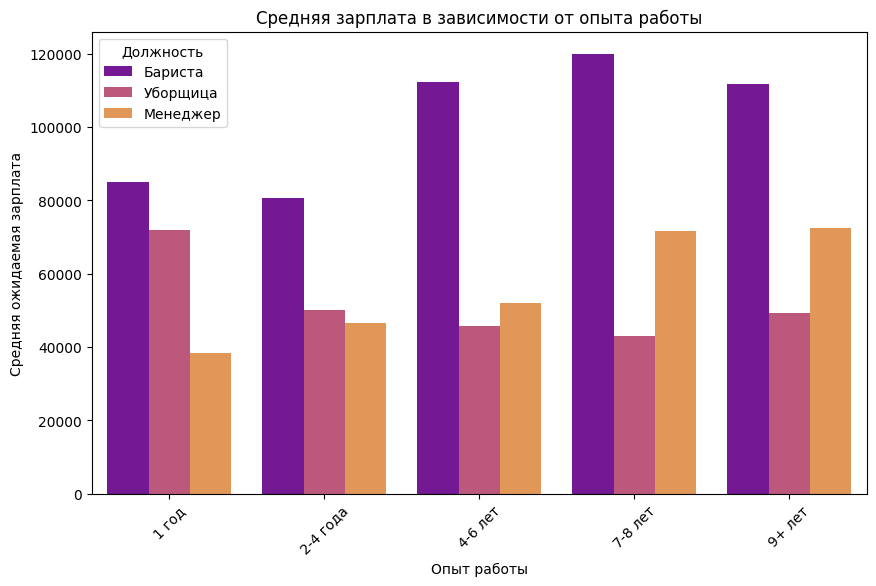

In [204]:
df_barista_new = df_barista_new.T
df_cleaning_new = df_cleaning_new.T
df_manager_new = df_manager_new.T

# Для бариста
groups_barista = []
for item in df_barista_new['experience']:  # Пример для бариста
    if item == 1:
        groups_barista.append('1 год')
    elif 2 <= item <= 4:
        groups_barista.append('2-4 года')
    elif 4 <= item <= 6:
        groups_barista.append('4-6 лет')
    elif 7 <= item <= 8:
        groups_barista.append('7-8 лет')
    else:
        groups_barista.append('9+ лет')

df_barista_new['Experience Group'] = groups_barista
df_barista_grouped = df_barista_new.groupby('Experience Group')['salary'].mean().reset_index()

# Для уборщицы
groups_cleaning = []
for item in df_cleaning_new['experience']:
    if item == 1:
        groups_cleaning.append('1 год')
    elif 2 <= item <= 5:
        groups_cleaning.append('2-4 года')
    elif 6 <= item <= 7:
        groups_cleaning.append('4-6 лет')
    elif 8 <= item <= 9:
        groups_cleaning.append('7-8 лет')
    else:
        groups_cleaning.append('9+ лет')

df_cleaning_new['Experience Group'] = groups_cleaning  # Сохраняем столбец 'Experience Group'
df_cleaning_grouped = df_cleaning_new.groupby('Experience Group')['salary'].mean().reset_index()

# Для менеджера
groups_manager = []
for item in df_manager_new['experience']:  # Пример для менеджера
    if item == 1:
        groups_manager.append('1 год')
    elif 2 <= item <= 4:
        groups_manager.append('2-4 года')
    elif 4 <= item <= 6:
        groups_manager.append('4-6 лет')
    elif 7 <= item <= 8:
        groups_manager.append('7-8 лет')
    else:
        groups_manager.append('9+ лет')

df_manager_new['Experience Group'] = groups_manager
df_manager_grouped = df_manager_new.groupby('Experience Group')['salary'].mean().reset_index()

# Объединяем все данные в один датафрейм
df_barista_grouped['role'] = 'Бариста'
df_cleaning_grouped['role'] = 'Уборщица'
df_manager_grouped['role'] = 'Менеджер'

df_all = pd.concat([df_barista_grouped, df_cleaning_grouped, df_manager_grouped])

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience Group', y='salary', hue='role', data=df_all, palette='plasma')

plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы')
plt.xticks(rotation=45)
plt.legend(title='Должность')

plt.show()


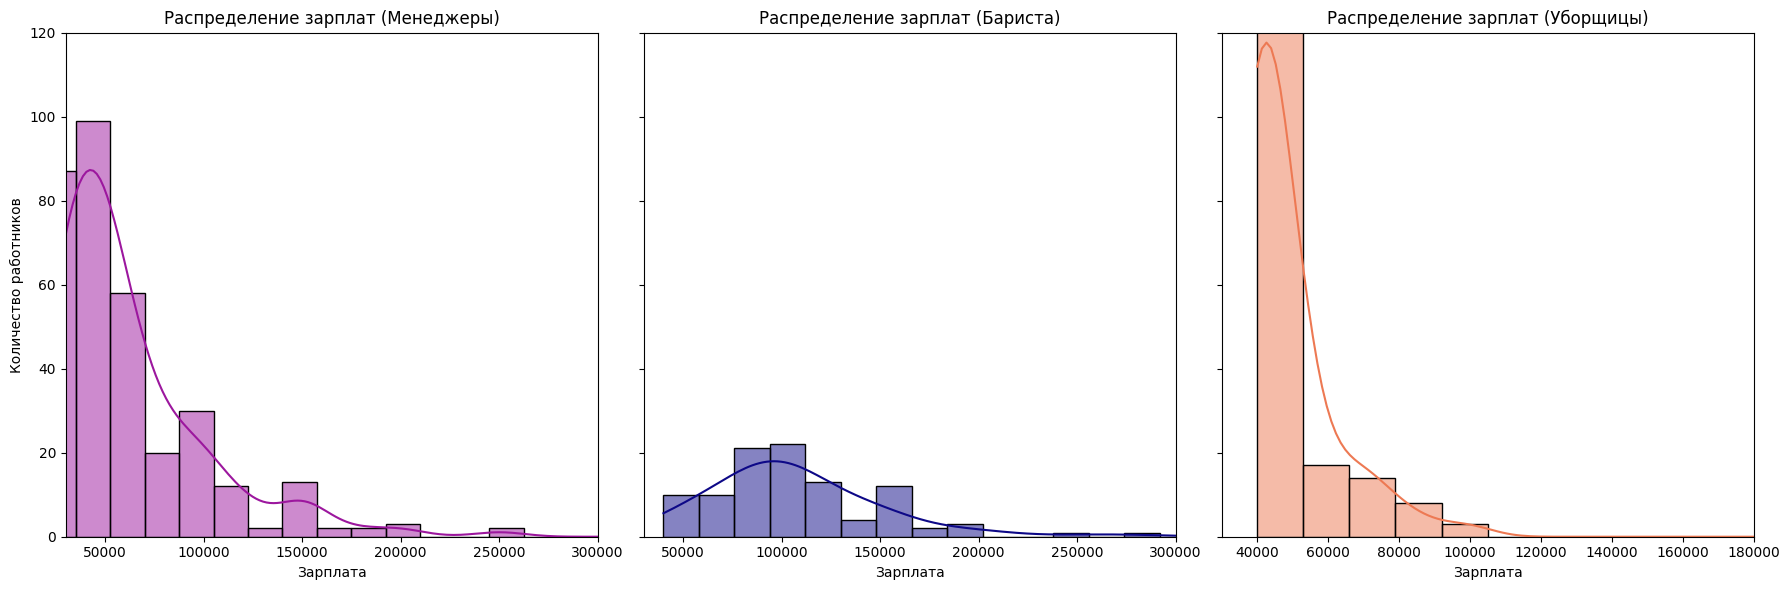

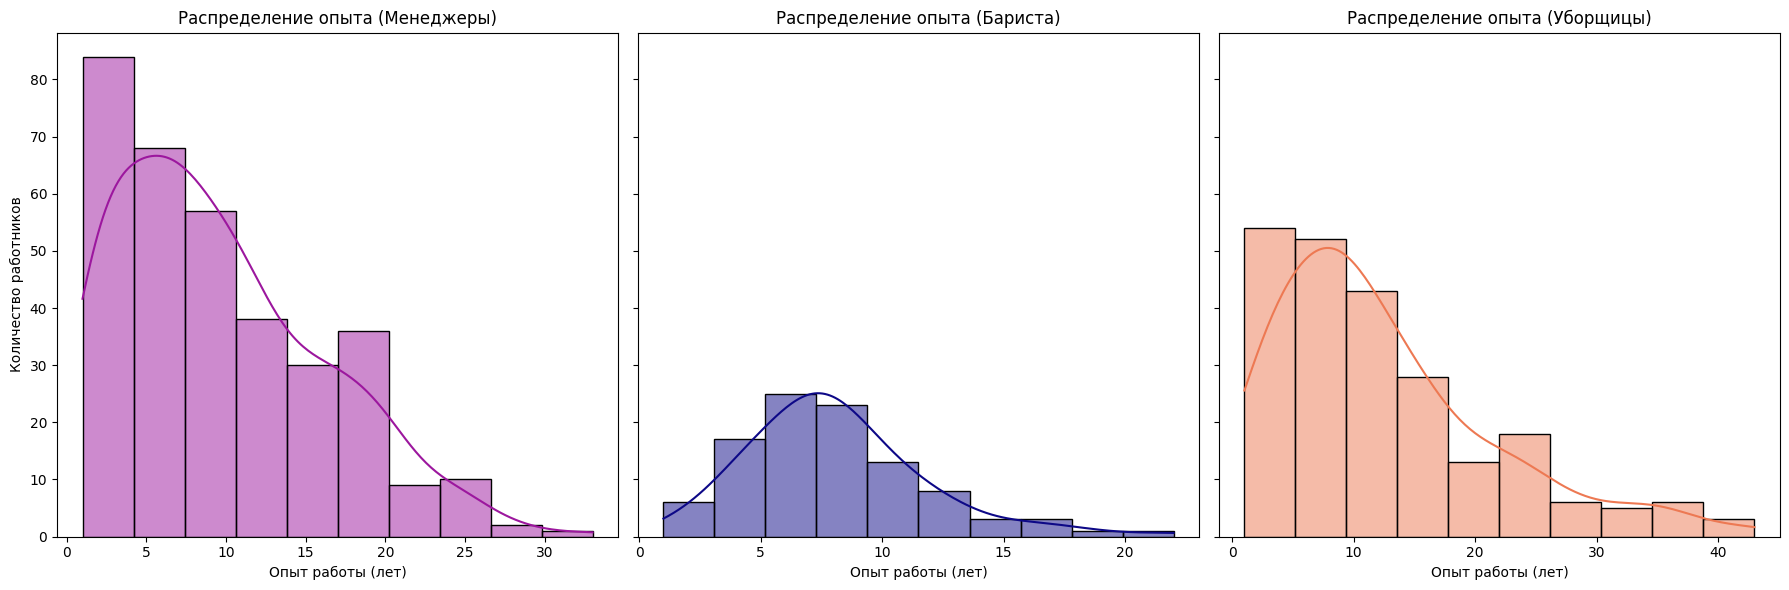

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим гистограммы зарплат для каждой профессии отдельно
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(df_manager_new['salary'], bins=20, kde=True, color='#9c179e', ax=axes[0])
axes[0].set_title('Распределение зарплат (Менеджеры)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Количество работников')
axes[0].set_xlim(30000, 300000)

sns.histplot(df_barista_new['salary'], bins=20, kde=True, color='#0d0887', ax=axes[1])
axes[1].set_title('Распределение зарплат (Бариста)')
axes[1].set_xlabel('Зарплата')
axes[1].set_xlim(30000, 300000)

sns.histplot(df_cleaning_new['salary'], bins=20, kde=True, color='#ed7953', ax=axes[2])
axes[2].set_title('Распределение зарплат (Уборщицы)')
axes[2].set_xlabel('Зарплата')
axes[2].set_xlim(30000, 180000)
axes[2].set_ylim(0, 120)

plt.tight_layout()
plt.show()

#['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(df_manager_new['experience'], bins=10, kde=True, color='#9c179e', ax=axes[0])
axes[0].set_title('Распределение опыта (Менеджеры)')
axes[0].set_xlabel('Опыт работы (лет)')
axes[0].set_ylabel('Количество работников')

sns.histplot(df_barista_new['experience'], bins=10, kde=True, color='#0d0887', ax=axes[1])
axes[1].set_title('Распределение опыта (Бариста)')
axes[1].set_xlabel('Опыт работы (лет)')

sns.histplot(df_cleaning_new['experience'], bins=10, kde=True, color='#ed7953', ax=axes[2])
axes[2].set_title('Распределение опыта (Уборщицы)')
axes[2].set_xlabel('Опыт работы (лет)')

plt.tight_layout()
plt.show()
